In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import time
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [2]:
data=pd.read_csv("./microbes.csv")
data


,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [3]:

data.shape

(30527, 26)

In [4]:
#Clear data
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data.shape

(30527, 25)

In [6]:
#Null Check
data.isnull().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [7]:
#No missing values for this dataset
data.isnull().sum().sum()

0

In [9]:
microorganisms = data['microorganisms'].unique()
microorganisms_counts = data.groupby(['microorganisms']).size()
microorganisms.sort()
print(microorganisms)

['Aspergillus sp' 'Diatom' 'Penicillum' 'Pithophora' 'Protozoa' 'Raizopus'

 'Spirogyra' 'Ulothrix' 'Volvox' 'Yeast']


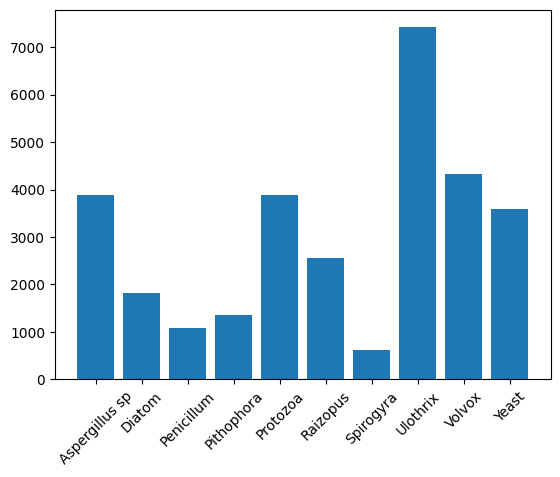

In [10]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [11]:
data['microorganisms'].value_counts()

Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Pithophora        1350
Penicillum        1080
Spirogyra          611
Name: microorganisms, dtype: int64

Text(0.5, 1.0, 'Target distribution')

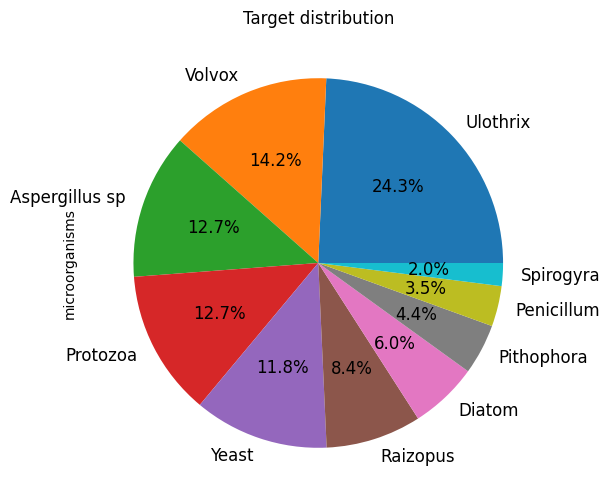

In [12]:
plt.figure(figsize=(6,6))

# Pie plot
data['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")

In [13]:
#Applying undersampling
def undersampling(microCount, k=611):
  if len(microCount) < k:
    return microCount
  return microCount.sample(k)

In [14]:
#Balance the data
data_undersampled = data.groupby('microorganisms').apply(undersampling).reset_index(drop=True)
data_undersampled ['microorganisms'].value_counts()

Aspergillus sp    611
Diatom            611
Penicillum        611
Pithophora        611
Protozoa          611
Raizopus          611
Spirogyra         611
Ulothrix          611
Volvox            611
Yeast             611
Name: microorganisms, dtype: int64

In [15]:
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.20,18.8,2.840,21.800,0.1430,6.06,22.100,22.8,21.500,10.30,...,21.800,0.772,0.730,0.5020,0.05670,21.800,11.00,0.3640,4.560,Aspergillus sp
1,9.18,18.6,1.580,8.860,0.0515,6.30,20.900,22.9,8.810,6.87,...,8.820,0.453,0.437,0.2240,0.02040,8.900,7.21,0.1180,1.140,Aspergillus sp
2,11.30,21.4,1.510,0.877,0.0458,8.95,12.900,22.9,0.406,9.79,...,0.406,0.487,0.284,0.1880,0.01500,0.553,9.83,0.1070,1.020,Aspergillus sp
3,10.80,22.9,1.870,6.070,0.0635,4.29,9.630,22.9,6.090,15.50,...,6.230,0.988,0.169,0.2780,0.02390,6.770,15.70,0.1620,1.320,Aspergillus sp
4,11.80,20.1,0.874,15.000,0.0157,8.14,0.287,23.0,15.000,19.90,...,15.000,0.245,0.189,0.0887,0.00514,14.900,20.10,0.0381,0.798,Aspergillus sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,6.49,15.1,8.210,9.390,1.4600,4.33,7.080,21.5,7.760,15.80,...,7.760,2.440,3.060,1.5600,0.72100,9.710,18.50,2.9600,5.670,Yeast
6106,14.70,21.4,3.540,5.290,0.2690,9.20,9.630,22.7,5.140,20.30,...,5.150,1.010,0.603,0.3160,0.06080,5.710,20.60,0.5610,7.590,Yeast
6107,9.98,20.2,3.160,13.300,0.1740,6.83,22.800,22.8,12.900,6.69,...,12.900,1.080,0.854,0.5400,0.07180,13.100,7.70,0.4500,4.580,Yeast
6108,15.60,20.3,3.350,17.800,0.2250,11.70,11.000,22.7,17.700,3.73,...,17.800,0.776,0.601,0.3200,0.05170,18.200,4.07,0.5040,3.850,Yeast


In [16]:
data_undersampled= data_undersampled.sample(frac = 1)
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
3500,12.50,15.1,1.18,17.40,0.0296,8.42,2.47,23.0,17.3000,21.700,...,17.500,0.247,0.305,0.1020,0.00863,17.30,21.90,0.0675,1.220,Raizopus
1932,11.30,20.0,2.28,3.41,0.1010,6.81,14.00,22.9,2.5700,5.110,...,2.570,0.594,0.478,0.3700,0.03360,2.87,5.47,0.2390,2.290,Pithophora
916,7.72,19.9,8.39,15.40,1.5300,5.76,12.60,20.1,11.6000,0.677,...,11.600,2.640,2.180,3.7600,0.63600,13.70,2.34,3.0900,5.900,Diatom
5516,6.02,21.9,4.83,13.60,0.4140,2.55,4.57,22.0,12.1000,5.550,...,12.100,2.250,1.120,1.2600,0.27200,13.70,7.78,1.0400,7.010,Yeast
4517,7.93,20.9,5.95,9.11,0.6890,4.97,1.63,21.6,8.2400,1.590,...,8.650,2.030,1.400,1.4500,0.31300,8.95,4.25,1.5700,8.210,Ulothrix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,12.80,18.5,5.93,12.10,0.7320,7.87,17.00,22.4,10.7000,8.940,...,10.700,1.460,1.440,0.6940,0.19300,11.60,10.20,1.5500,6.340,Yeast
5347,12.20,22.6,5.34,2.66,0.5740,4.42,16.00,22.3,0.0871,19.700,...,0.131,2.260,0.673,0.7610,0.16500,1.19,20.80,1.2600,4.240,Volvox
5681,10.40,15.8,3.50,15.10,0.3310,7.03,10.70,22.7,14.7000,8.030,...,14.700,0.903,1.080,0.3240,0.08380,15.30,8.69,0.5490,4.930,Yeast
337,9.23,22.8,1.33,1.24,0.0359,3.51,2.28,22.8,1.1600,16.300,...,1.160,0.751,0.149,0.2350,0.01450,1.17,16.90,0.0838,1.650,Aspergillus sp


In [17]:
microorganisms = data_undersampled['microorganisms'].unique()
microorganisms_counts = data_undersampled.groupby(['microorganisms']).size()
microorganisms.sort()
print(microorganisms)


['Aspergillus sp' 'Diatom' 'Penicillum' 'Pithophora' 'Protozoa' 'Raizopus'

 'Spirogyra' 'Ulothrix' 'Volvox' 'Yeast']


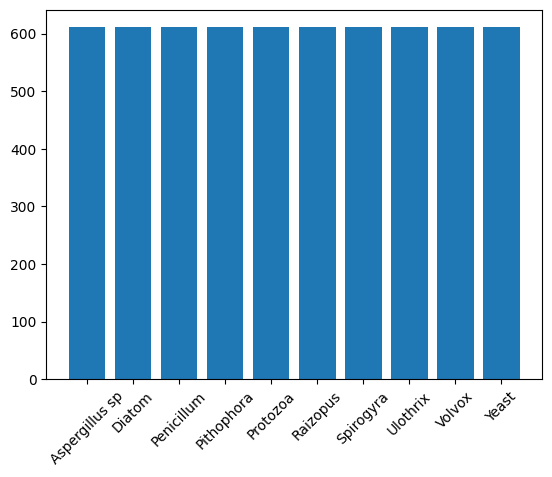

In [18]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()



In [19]:
#Split Data
X=data_undersampled[data_undersampled.columns[:-1]] 
y=data_undersampled['microorganisms']

In [20]:
#Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

In [21]:
#Split 60% for train data kai 40% for test data

##Create and fit our SVM model with linear kernel
train_data,test_data,train_labels,test_labels=train_test_split(X,y,test_size=0.4,train_size=0.6)

clf = svm.SVC(kernel='linear')
start_time=time.time()
clf.fit(train_data,train_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")

#Start time and get predicitions
start_time=time.time()
y_pred =clf.predict(test_data)
end_time=time.time()
print(f"testing time: {end_time - start_time } s\n")

#Check Accuracy & f-score of the model
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(y_true = test_labels ,y_pred=y_pred),"\n")
print("f1 score :", metrics.f1_score(test_labels, y_pred,average='macro'),"\n")

training time: 11.173528909683228 s



testing time: 0.23105168342590332 s



accuracy: 0.5347790507364976 



f1 score : 0.5262556029251673 




In [22]:
#Create and fit our SVM model with the RBF kernel

rbf_svm = svm.SVC(kernel='rbf')
start_time=time.time()
rbf_svm.fit(train_data,train_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")

#Start time and get predicitions
start_time=time.time()
y_pred =rbf_svm.predict(test_data)
end_time=time.time()
print(f"testing time: {end_time - start_time } s\n")

#Check Accuracy & f-score of the model 
print("accuracy:", metrics.accuracy_score(y_true=test_labels, y_pred=y_pred),"\n")
print("f1 score :", metrics.f1_score(test_labels, y_pred,average='macro'),"\n")

training time: 0.781174898147583 s



testing time: 0.9032037258148193 s



accuracy: 0.4787234042553192 



f1 score : 0.4644832368225126 




In [ ]:
#With Linear kernel we had better results so cross-validation will follow finding the most suitables parameters
hyperparametres=[{'C':[5,10,15],'gamma':[1,10,100]}]
kf=KFold(n_splits=5,shuffle=True,random_state=10)
rbf_svm = svm.SVC(kernel='rbf')
grid_search=GridSearchCV(estimator=rbf_svm,param_grid=hyperparametres,scoring='accuracy',cv=kf,verbose=10,return_train_score=True)
grid_search.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# Converting C to numeric type for plotting on x-axis

cv_results['param_C'] = cv_results['param_C'].astype('int')

#plot
plt.figure(figsize=(16,8))

In [ ]:
# Subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale("linear")

In [ ]:
# Subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==10]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('linear')

In [ ]:

# Subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==100]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('linear')

In [ ]:
# Printing the optimal accuracy score and hyperparametres

best_score = grid_search.best_score_
best_hyperparametres =grid_search.best_params_

print("The best test score is {0} corresponding to hyperparametres {1}".format(best_score,best_hyperparametres))

In [ ]:
#Training the model with the most suitable parametres that cross -valide show

best_rbf_model =svm.SVC(C=-, gamma=-, kernel="linear")
start_time=time.time()
best_rbf_model.fit(X_train, y_train)
end_time=time.time()
print(f"training time:{end_time-start_time}s\n")

#Make predictions

start_time=time.time()
y_pred = best_rbf_model.predict(X_test)
end_time=time.time()
print(f"testing time:{end_time-start_time} s\n")

#Metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("f1 score :",metrics.f1_score(y_test, y_pred,average='macro'), "\n")

In [ ]:
#The len from support vectors
len(best_rbf_model.support_vectors_)

In [ ]:
#K-Nearest Neighbors


kVals=range(1,30,2)
accuracies=[]

for k in range(1,30,2): 

   modelknn=KNeighborsClassifier(n_neighbors=k)

   start_time=time.time()
   modelknn.fit(X_train,y_train)
   end_time=time.time()
   print (f" KNN training time:{end_time-start_time} s\n")

   start_time=time.time()
   score=modelknn.score(X_test,y_test)
   end_time=time.time()
   print (f"KNN testing time:{end_time-start_time} s\n")
   
   print("k=%d,accuracy=%.2f%%" % (k,score*100))
   accuracies.append(score)

#Find the K with the largest accuracy
i=int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% " % (kVals[i],
	accuracies[i] * 100))

In [ ]:
#NCC
modelncc=NearestCentroid()
start_time=time.time()
modelncc.fit(X_train,y_train)
end_time=time.time()
print (f"NCC training time:{end_time-start_time} s\n")

start_time=time.time()
score=modelncc.score(X_test,y_test)
end_time=time.time()
print (f"NCC testing time:{end_time-start_time} s\n")
print("accuracy=%.2f%%" % (score*100))
